<a href="https://colab.research.google.com/github/chinmaydr/fastpages/blob/gh-pages/ProjectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 8.2 MB/s 
time: 434 µs (started: 2022-11-11 22:47:12 +00:00)


time: 10.8 ms (started: 2022-11-11 22:47:12 +00:00)


In [3]:
#@title Load your dataset
import pandas as pd

!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/Physics/Sloan%20Digital%20Sky%20Survey/SDSS_data.csv"
sdss_data = pd.read_csv('SDSS_data.csv', low_memory=False, header = 1)
print(isinstance(sdss_data,pd.DataFrame))

SDSS_data.csv       100%[===================>]  78.69M   101MB/s    in 0.8s    
True
time: 2.95 s (started: 2022-11-11 22:47:12 +00:00)


In [4]:
print(sdss_data.isnull().sum().sum())#look for null values
sdss_data

0


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237678877245244171,318.951692,9.315146,19.51665,18.50036,17.95667,17.53139,17.32035,7777,301,5,53,819657923239110656,GALAXY,0.114299,728,52520,10
1,1237668332026986542,217.940001,14.608378,19.13548,18.55482,17.95603,17.68272,17.63717,5322,301,3,56,6154252554903769088,QSO,1.802680,5466,56033,304
2,1237664092899115053,129.948221,25.213328,19.54955,18.19434,17.83220,17.51329,17.47054,4335,301,3,130,2173034979993348096,GALAXY,0.070813,1930,53347,175
3,1237654604252119048,160.357788,3.567886,17.72343,16.65830,16.23667,16.07098,16.02797,2126,301,1,275,649647859372681216,STAR,0.000570,577,52367,13
4,1237661360769400880,226.001700,38.619699,16.60500,15.66234,15.39406,15.29443,15.29302,3699,301,2,227,5817649714997514240,STAR,-0.000184,5167,56066,454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1237661069255639209,167.169668,13.963371,18.33024,17.41838,17.14917,17.03306,16.99625,3631,301,3,336,1972663829775017984,GALAXY,0.025480,1752,53379,317
499996,1237665565001187348,225.558331,18.500700,18.73732,17.22944,16.58573,16.36947,16.26186,4678,301,1,161,3143591231423014912,STAR,-0.000060,2792,54556,286
499997,1237659119323119750,215.473064,50.610086,19.57830,18.01280,17.32779,16.90973,16.66470,3177,301,3,71,1177785077195630592,GALAXY,0.077123,1046,52460,341
499998,1237659119336554740,248.658281,31.979162,18.01998,16.62829,15.93923,15.56417,15.33296,3177,301,3,276,1508818621768427520,GALAXY,0.085555,1340,52781,410


time: 131 ms (started: 2022-11-11 22:47:15 +00:00)


In [5]:
new_data = sdss_data.drop(["ra","dec","run","rerun","camcol","field","specobjid","plate","mjd","fiberid"],axis = 1)#drop all unnexessary colums
new_data["class"] = sdss_data["class"].replace(["GALAXY","STAR","QSO"],[0,1,2])#replace galaxy, star and quasar with 0, 1, and 2
new_data

,objid,u,g,r,i,z,class,redshift
0,1237678877245244171,19.51665,18.50036,17.95667,17.53139,17.32035,0,0.114299
1,1237668332026986542,19.13548,18.55482,17.95603,17.68272,17.63717,2,1.802680
2,1237664092899115053,19.54955,18.19434,17.83220,17.51329,17.47054,0,0.070813
3,1237654604252119048,17.72343,16.65830,16.23667,16.07098,16.02797,1,0.000570
4,1237661360769400880,16.60500,15.66234,15.39406,15.29443,15.29302,1,-0.000184
...,...,...,...,...,...,...,...,...
499995,1237661069255639209,18.33024,17.41838,17.14917,17.03306,16.99625,0,0.025480
499996,1237665565001187348,18.73732,17.22944,16.58573,16.36947,16.26186,1,-0.000060
499997,1237659119323119750,19.57830,18.01280,17.32779,16.90973,16.66470,0,0.077123
499998,1237659119336554740,18.01998,16.62829,15.93923,15.56417,15.33296,0,0.085555


time: 400 ms (started: 2022-11-11 22:47:15 +00:00)


In [6]:
new_data.groupby(["class"]).count()

,objid,u,g,r,i,z,redshift
class,,,,,,,
0,252221,252221,252221,252221,252221,252221,252221
1,193243,193243,193243,193243,193243,193243,193243
2,54536,54536,54536,54536,54536,54536,54536


time: 49 ms (started: 2022-11-11 22:47:16 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing im

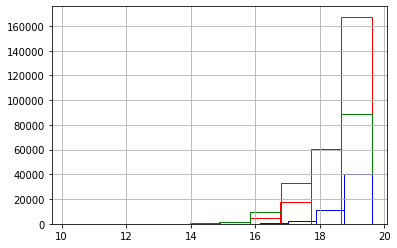

time: 381 ms (started: 2022-11-11 22:47:16 +00:00)


In [7]:
galaxy_data = new_data.loc[new_data['class']==0]#separating galaxy, star and quasar data
galaxy_data["u"][galaxy_data["u"]<0] = 1#replaing negative values with 1 values(may remove)
galaxy_data["g"][galaxy_data["g"]<0] = 1
galaxy_data["r"][galaxy_data["r"]<0] = 1
galaxy_data["i"][galaxy_data["i"]<0] = 1
galaxy_data["z"][galaxy_data["z"]<0] = 1
star_data = sdss_data.loc[new_data['class']==1]
star_data["u"][star_data["u"]<0] = 1
star_data["g"][star_data["g"]<0] = 1
star_data["r"][star_data["r"]<0] = 1
star_data["i"][star_data["i"]<0] = 1
star_data["z"][star_data["z"]<0] = 1
quasar_data = new_data.loc[new_data['class']==2]
quasar_data["u"][quasar_data["u"]<0] = 1
quasar_data["g"][quasar_data["g"]<0] = 1
quasar_data["r"][quasar_data["r"]<0] = 1
quasar_data["i"][quasar_data["i"]<0] = 1
quasar_data["z"][quasar_data["z"]<0] = 1
galaxy_data["u"].hist(edgecolor = "red",fill = False,histtype = 'bar')#print data for u emmission
star_data["u"].hist(edgecolor = "green",fill = False,histtype = 'bar')
quasar_data["u"].hist(edgecolor = "blue",fill = False,histtype = 'bar')



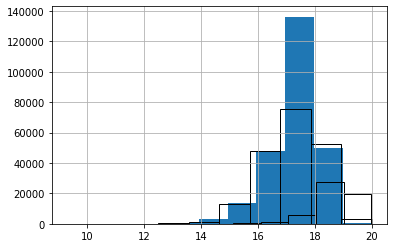

time: 325 ms (started: 2022-11-11 22:47:16 +00:00)


In [8]:
galaxy_data["g"].hist(fill = "red")#print data for g emmission
star_data["g"].hist(fill = False)
quasar_data["g"].hist(fill = False)


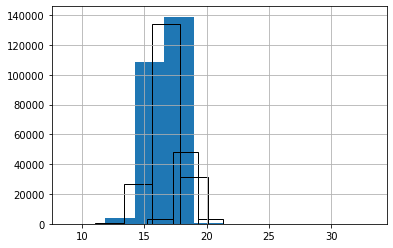

time: 316 ms (started: 2022-11-11 22:47:16 +00:00)


In [9]:
galaxy_data["r"].hist()#print data for r emmission
star_data["r"].hist(fill = False)
quasar_data["r"].hist(fill = False)


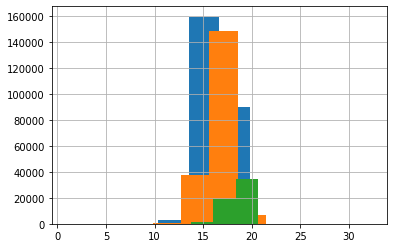

time: 281 ms (started: 2022-11-11 22:47:17 +00:00)


In [10]:
galaxy_data["i"].hist()#print data for i emmission
star_data["i"].hist()
quasar_data["i"].hist()

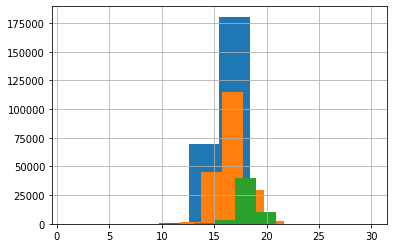

time: 234 ms (started: 2022-11-11 22:47:17 +00:00)


In [11]:
galaxy_data["z"].hist()#print data for z emmission
star_data["z"].hist()
quasar_data["z"].hist()

In [12]:
import numpy as np
galaxy_data["ratio"] = galaxy_data["u"]/galaxy_data["g"]/galaxy_data["r"]/galaxy_data["i"]/galaxy_data["z"]
star_data["ratio"] = star_data["u"]/star_data["g"]/star_data["r"]/star_data["i"]/star_data["z"]
quasar_data["ratio"] = quasar_data["u"]/quasar_data["g"]/quasar_data["r"]/quasar_data["i"]/quasar_data["z"]
print(np.mean(galaxy_data["ratio"]))#print ratios of all emmission averages
print(np.mean(star_data["ratio"]))
print(np.mean(quasar_data["ratio"]))

0.0002576531696346555
0.0002390422833094593
0.00016558347239016552
time: 25.5 ms (started: 2022-11-11 22:47:17 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [13]:
print(np.mean(galaxy_data["redshift"]))#prints mean of all redshift averages
print(np.mean(star_data["redshift"]))
print(np.mean(quasar_data["redshift"]))

0.07850500714056007
-0.00010583836902490517
1.23732595663364
time: 4.08 ms (started: 2022-11-11 22:47:17 +00:00)


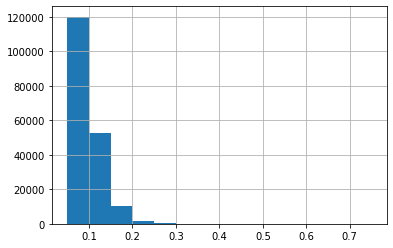

time: 323 ms (started: 2022-11-11 22:47:17 +00:00)


In [14]:
galaxy_data["redshift"].hist(bins = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75])

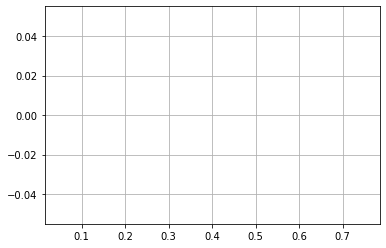

time: 241 ms (started: 2022-11-11 22:47:18 +00:00)


In [15]:
star_data["redshift"].hist(bins = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75])


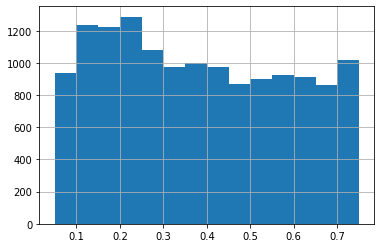

time: 459 ms (started: 2022-11-11 22:47:18 +00:00)


In [16]:
quasar_data["redshift"].hist(bins = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75])

252221


objid        7794
u           10474
g            9662
r            6449
i            5704
z            4722
class           0
redshift     4123
ratio        9228
dtype: int64

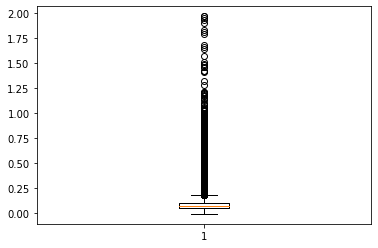

time: 427 ms (started: 2022-11-11 22:47:18 +00:00)


In [17]:
import matplotlib
matplotlib.pyplot.boxplot(galaxy_data["redshift"])
Q1 = galaxy_data.quantile(0.25)
Q3 = galaxy_data.quantile(0.75)
IQR = Q3 - Q1
print(len(galaxy_data))

((galaxy_data < (Q1 - 1.5 * IQR)) | (galaxy_data > (Q3 + 1.5 * IQR))).sum()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0024fe6750>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0024fee210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0024fe6190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0024feecd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0024ff4250>],
 'means': []}

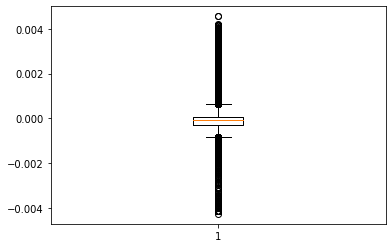

time: 327 ms (started: 2022-11-11 22:47:19 +00:00)


In [18]:
matplotlib.pyplot.boxplot(star_data["redshift"])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f0024fd3b90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0024f5a650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0024fd35d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0024f61150>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0024f61690>],
 'means': []}

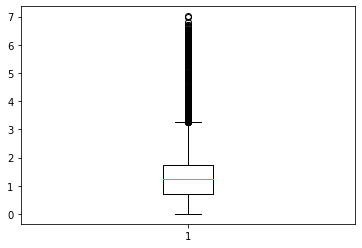

time: 230 ms (started: 2022-11-11 22:47:19 +00:00)


In [19]:
matplotlib.pyplot.boxplot(quasar_data["redshift"])

In [20]:
ver = new_data.sample(frac = 0.8)
ver

,objid,u,g,r,i,z,class,redshift
422463,1237665531723579461,17.51955,16.01839,15.28195,14.87697,14.57269,0,0.045086
27835,1237665443126181902,17.76600,16.65331,16.25307,16.11395,16.05754,1,-0.000155
255053,1237655108366434406,18.59141,17.45057,17.05900,16.76677,16.65730,0,0.068898
203066,1237651496836595749,18.45873,17.57054,17.21213,17.10564,17.09443,1,0.000207
454249,1237661356464144497,19.37373,18.45507,18.25058,18.16921,18.20560,1,-0.000511
...,...,...,...,...,...,...,...,...
15243,1237651298723889445,19.22217,18.13646,17.68431,17.34289,17.16734,0,0.110179
90149,1237652900226269199,17.03506,15.74572,15.22394,15.01754,14.96488,1,-0.000151
310714,1237657608038580471,19.55284,18.18721,17.30764,16.85969,16.60089,0,0.200904
190030,1237661382771671118,17.37121,15.80629,15.05866,14.64847,14.32173,0,0.050576


time: 99.7 ms (started: 2022-11-11 22:47:20 +00:00)


In [21]:
test = new_data.drop(ver.index)
test

,objid,u,g,r,i,z,class,redshift
1,1237668332026986542,19.13548,18.55482,17.95603,17.68272,17.63717,2,1.802680
2,1237664092899115053,19.54955,18.19434,17.83220,17.51329,17.47054,0,0.070813
8,1237665531711717506,19.32478,19.11792,19.02775,18.90752,18.84031,2,0.754256
10,1237663785276866579,18.52980,17.20181,16.68587,16.50419,16.51068,1,-0.000149
23,1237672794496630922,19.57022,18.07215,17.50804,17.31805,17.23824,1,-0.000038
...,...,...,...,...,...,...,...,...
499967,1237665569297137890,18.42249,17.52368,17.26219,17.16936,17.16315,1,-0.000718
499969,1237661069255377000,19.29492,18.10098,17.60255,17.34080,17.09894,0,0.045109
499987,1237658492801646907,18.89996,17.91562,17.72296,17.59593,17.49516,0,0.025669
499991,1237653438155653206,19.18170,17.92916,17.35441,17.02650,16.82827,0,0.071380


time: 249 ms (started: 2022-11-11 22:47:20 +00:00)


In [22]:
from urllib.request import urlretrieve
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import  metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy.signal import savgol_filter
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,plot_confusion_matrix,precision_score,recall_score,f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, normalize 

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, Conv2D, MaxPooling2D, BatchNormalization, MaxPooling1D
from keras.losses import categorical_crossentropy
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

time: 8.53 s (started: 2022-11-11 22:47:20 +00:00)


In [23]:
def reset(train,test):
    train_X = train.drop(['objid','class'],axis = 1)
    train_y = train['class'].values
    test_X = test.drop(['objid','class'], axis = 1)
    test_y = test['class'].values
    return train_X,train_y,test_X,test_y

train_X,train_y,test_X,test_y = reset(ver, test)

time: 20.3 ms (started: 2022-11-11 22:47:29 +00:00)


In [24]:
model = MLPClassifier(random_state = 1, max_iter = 300, hidden_layer_sizes = (10))

time: 928 µs (started: 2022-11-11 22:47:29 +00:00)


-------------------------------------------
Model Results

Training:


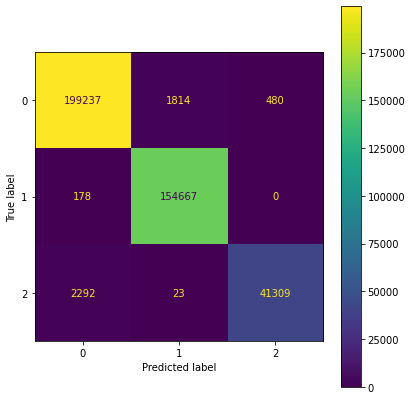

Testing:


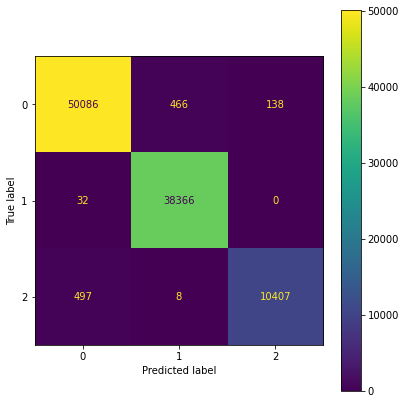

None
time: 1min 37s (started: 2022-11-11 22:47:29 +00:00)


In [25]:
def analyze_results(model, train_X, train_y, test_X, test_y):
    """
    Helper function to help interpret and model performance.
    
    Args:
    model: estimator instance
    train_X: {array-like, sparse matrix} of shape (n_samples, n_features)
    Input values for model training.
    train_y : array-like of shape (n_samples,)
    Target values for model training.
    test_X: {array-like, sparse matrix} of shape (n_samples, n_features)
    Input values for model testing.
    test_y : array-like of shape (n_samples,)
    Target values for model testing.

    Returns:
    None
    """
    print("-------------------------------------------")
    print("Model Results")
    print("")
    print("Training:")
    if type(model) == keras.engine.sequential.Sequential:
      train_predictions = model.predict(train_X)
      train_predictions = (train_predictions > 0.5)
      cm = confusion_matrix(train_y, train_predictions)
      labels = [0, 1]
      df_cm = pd.DataFrame(cm,index = labels,columns = labels)
      fig = plt.figure()
      res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
      #plt.yticks([1.25, 3.75], labels,va='center')
      plt.title('Confusion Matrix - TestData')
      plt.ylabel('True label')
      plt.xlabel('Predicted label')
      plt.show()
    else:
      fig = plt.figure(figsize=(22,7))
      ax = fig.add_subplot(1,3,1)
      plot_confusion_matrix(model,train_X,train_y,ax=ax,values_format = '.0f')
      plt.show()
    print("Testing:")
    if type(model) == keras.engine.sequential.Sequential:
      test_predictions = model.predict(test_X)
      test_predictions = (test_predictions > 0.5)
      cm = confusion_matrix(test_y, test_predictions)
      labels = [0, 1]
      df_cm = pd.DataFrame(cm,index = labels,columns = labels)
      fig = plt.figure()
      res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
      #plt.yticks([1.25, 3.75], labels,va='center')
      plt.title('Confusion Matrix - TestData')
      plt.ylabel('True label')
      plt.xlabel('Predicted label')
      plt.show()
    else:
      fig = plt.figure(figsize=(22,7))
      ax = fig.add_subplot(1,3,1)
      plot_confusion_matrix(model,test_X,test_y,ax=ax,values_format = '.0f')
      plt.show()
model.fit(train_X,train_y)
print(analyze_results(model, train_X, train_y, test_X, test_y))

-------------------------------------------
Model Results

Training:


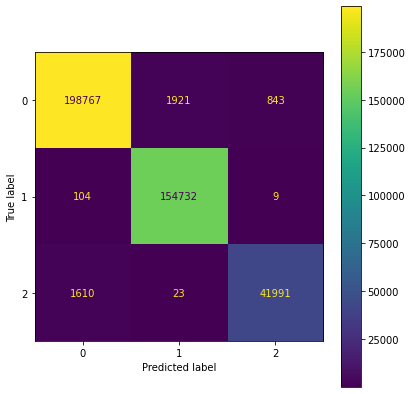

Testing:


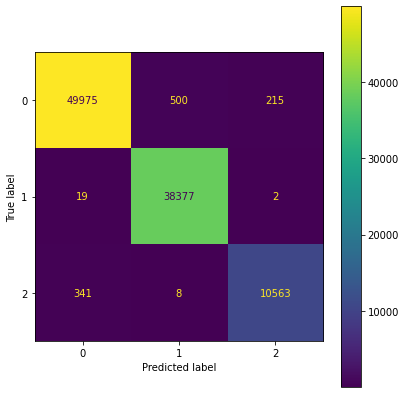

time: 2min 3s (started: 2022-11-11 22:49:06 +00:00)


In [26]:
ver["ratio"] = ver["u"]/ver["g"]/ver["r"]/ver["i"]/ver["z"]
test["ratio"] = test["u"]/test["g"]/test["r"]/test["i"]/test["z"]
ratiotrain_X,ratiotrain_y,ratiotest_X,ratiotest_y = reset(ver, test)
ratiomodel = MLPClassifier(random_state = 1, max_iter = 300, hidden_layer_sizes = (10))
ratiomodel.fit(ratiotrain_X,ratiotrain_y)
analyze_results(ratiomodel, ratiotrain_X, ratiotrain_y, ratiotest_X, ratiotest_y)

-------------------------------------------
Model Results

Training:


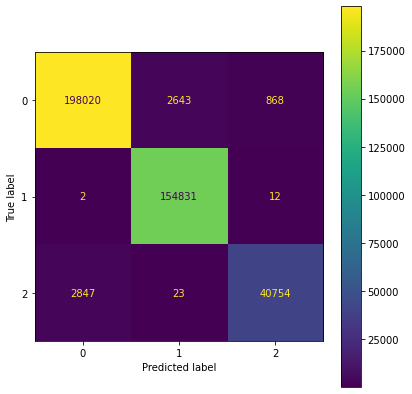

Testing:


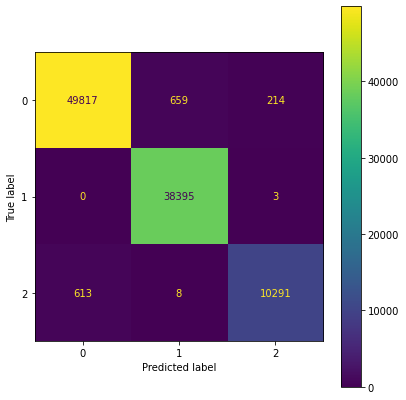

time: 1min 53s (started: 2022-11-11 22:51:10 +00:00)


In [27]:
model = MLPClassifier(random_state = 1, max_iter = 300, hidden_layer_sizes = (8,8))  # YOUR CODE HERE
model.fit(train_X,train_y)
analyze_results(model, train_X, train_y, test_X, test_y)#98.616% accuracy

-------------------------------------------
Model Results

Training:


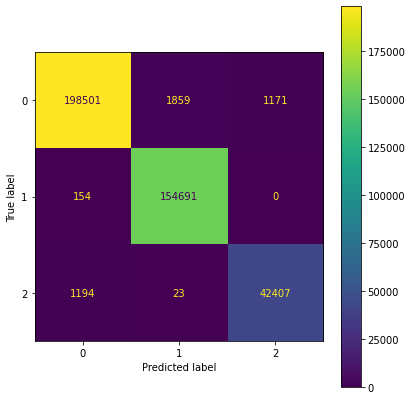

Testing:


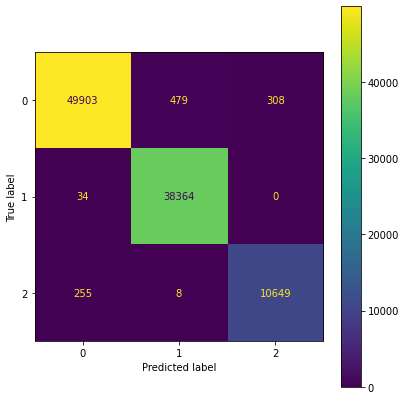

time: 3min 7s (started: 2022-11-11 22:53:03 +00:00)


In [28]:
model = MLPClassifier(random_state = 1, max_iter = 300, hidden_layer_sizes = (15,15,15))  # YOUR CODE HERE
model.fit(train_X,train_y)
analyze_results(model, train_X, train_y, test_X, test_y)#98.87% accuracy

-------------------------------------------
Model Results

Training:


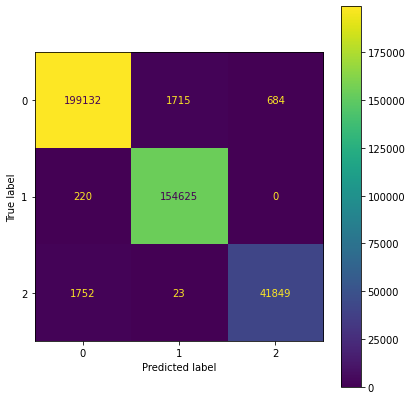

Testing:


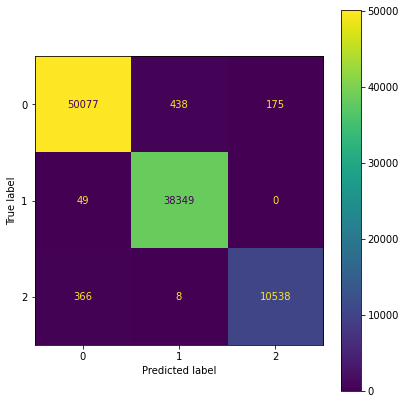

time: 2min 13s (started: 2022-11-11 22:56:10 +00:00)


In [29]:
model = MLPClassifier(random_state = 1, max_iter = 300, hidden_layer_sizes = (8,8,8,8,8))  # YOUR CODE HERE
model.fit(train_X,train_y)
analyze_results(model, train_X, train_y, test_X, test_y)#98.87% accuracy

-------------------------------------------
Model Results

Training:


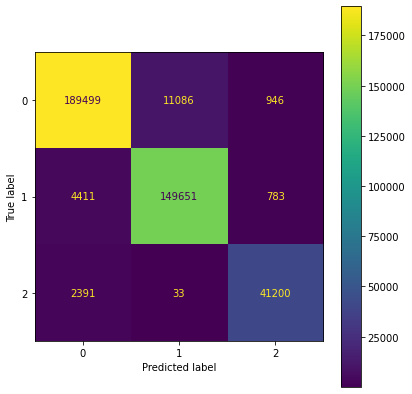

Testing:


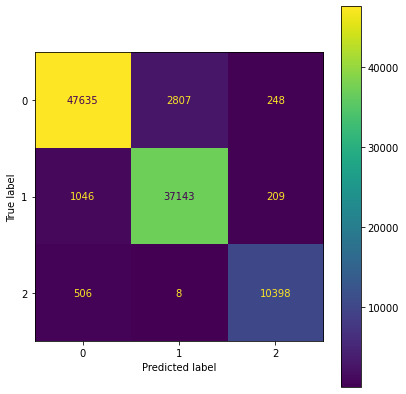

time: 28.2 s (started: 2022-11-11 22:58:24 +00:00)


In [30]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(train_X, train_y)
y_pred = clf.predict(test_X)
clf.predict_proba(test_X)
clf.score(test_X, test_y)#94.941%
analyze_results(clf, train_X, train_y, test_X, test_y)#98.87% accuracy

In [31]:
train_X

,u,g,r,i,z,redshift
422463,17.51955,16.01839,15.28195,14.87697,14.57269,0.045086
27835,17.76600,16.65331,16.25307,16.11395,16.05754,-0.000155
255053,18.59141,17.45057,17.05900,16.76677,16.65730,0.068898
203066,18.45873,17.57054,17.21213,17.10564,17.09443,0.000207
454249,19.37373,18.45507,18.25058,18.16921,18.20560,-0.000511
...,...,...,...,...,...,...
15243,19.22217,18.13646,17.68431,17.34289,17.16734,0.110179
90149,17.03506,15.74572,15.22394,15.01754,14.96488,-0.000151
310714,19.55284,18.18721,17.30764,16.85969,16.60089,0.200904
190030,17.37121,15.80629,15.05866,14.64847,14.32173,0.050576


time: 13.7 ms (started: 2022-11-11 22:58:52 +00:00)


0.9898
-------------------------------------------
Model Results

Training:


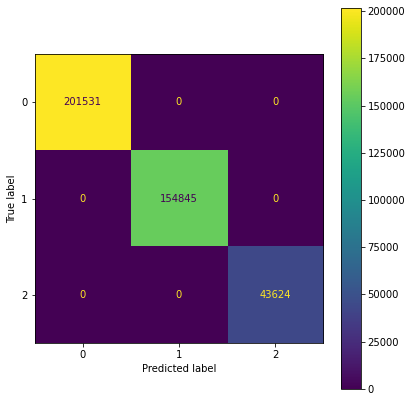

Testing:


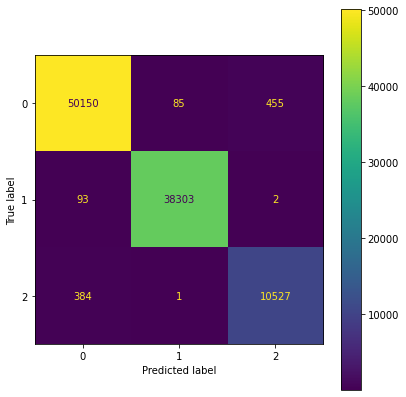

time: 6.36 s (started: 2022-11-11 22:58:52 +00:00)


In [32]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
model = DecisionTreeClassifier()
model = model.fit(train_X,train_y)
classifier = model.predict(test_X)
print(metrics.accuracy_score(test_y, classifier))
analyze_results(model, train_X, train_y, test_X, test_y)#98.87% accuracy

-------------------------------------------
Model Results

Training:


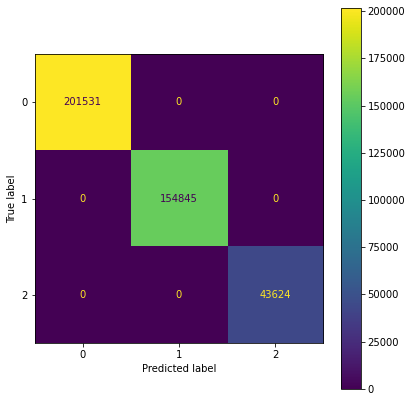

Testing:


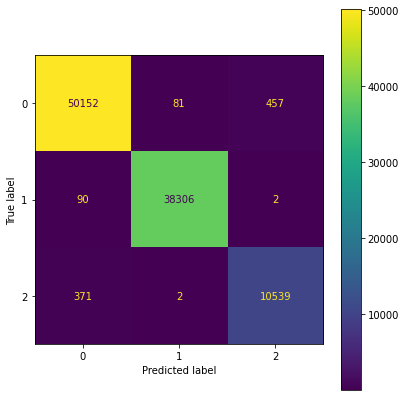

time: 6.37 s (started: 2022-11-11 22:58:59 +00:00)


In [33]:
history = model.fit(train_X,train_y)
analyze_results(model, train_X, train_y, test_X, test_y)

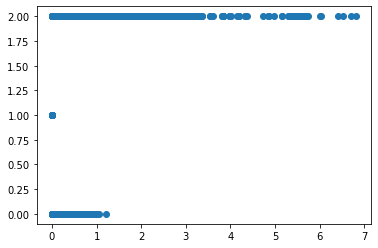

time: 471 ms (started: 2022-11-11 22:59:05 +00:00)


In [34]:
matplotlib.pyplot.scatter(test_X[test_y == classifier].redshift,test_y[test_y == classifier])

time: 484 ms (started: 2022-11-11 22:59:05 +00:00)


time: 495 ms (started: 2022-11-11 22:59:05 +00:00)


|Model|Overall Accuracy|Galaxy Accuracy|Star Accuracy|Quasar Accuracy|
|-----|----------------|---------------|-------------|---------------|
|Logistic Regression|94.94%|93.34%|96.57%|93.98%|
|Decision Tree|98.90%|98.90%|99.79%|95.77%|


time: 509 ms (started: 2022-11-11 22:59:05 +00:00)


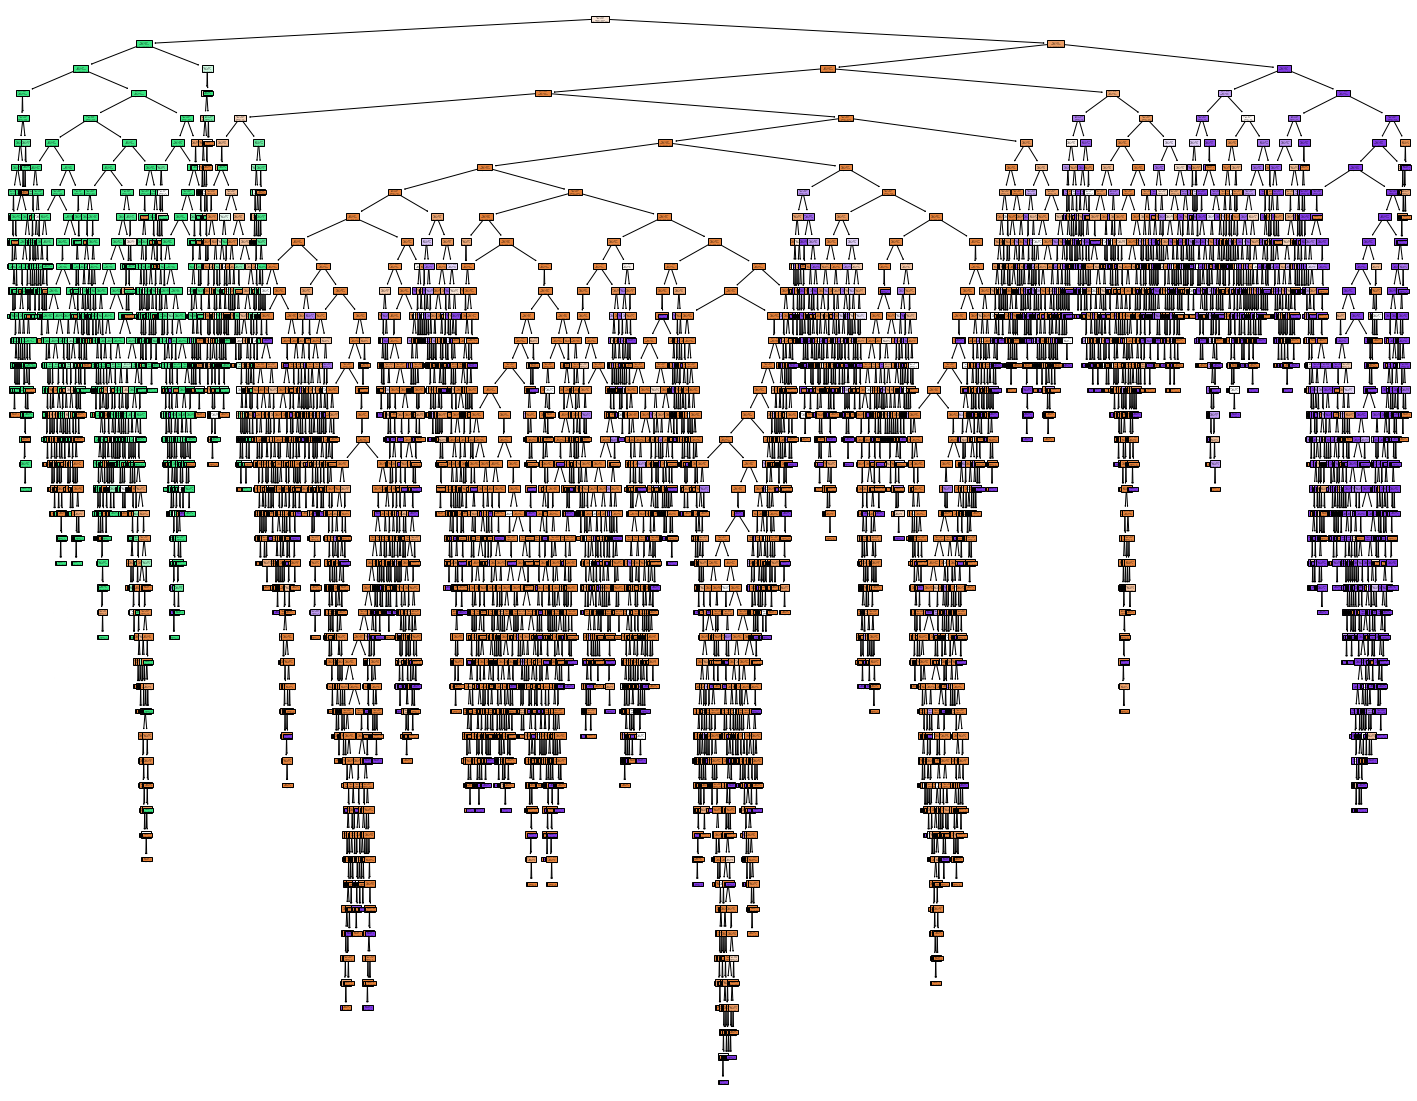

In [35]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   filled=True)

In [37]:
fig.savefig("dectree.png")

time: 35.8 s (started: 2022-11-11 23:07:14 +00:00)


In [39]:
txt = tree.export_text(model)
print(txt)
with open("dectreetxt.log","w") as fdhhf:
  fdhhf.write(txt)

|--- feature_5 <= 0.00
|   |--- feature_5 <= 0.00
|   |   |--- feature_5 <= -0.00
|   |   |   |--- feature_5 <= -0.01
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  -0.01
|   |   |   |   |--- feature_4 <= 22.60
|   |   |   |   |   |--- feature_1 <= 19.82
|   |   |   |   |   |   |--- feature_3 <= 14.00
|   |   |   |   |   |   |   |--- feature_3 <= 13.99
|   |   |   |   |   |   |   |   |--- feature_4 <= 13.22
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 13.19
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_4 >  13.19
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_4 >  13.22
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_3 >  13.99
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  14.00
|   |   |   |   |   |   |   |--- feature_4 <= 15.20
|   |   |   |   |   |   |   |   |--- feature